<a href="https://colab.research.google.com/github/juliorodrigues07/manuscript_digit_recognition/blob/master/cnn_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação de DNN e CNN para reconhecimento de dígitos manuscritos

- **Importação das bibliotecas necessárias para formular o modelo de aprendizado**

In [142]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 as cv
import math
import os

from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from keras.models import load_model
from keras import optimizers
from keras import datasets
from keras import layers

dir = '/mnist_model/'
if not os.path.exists(dir):
  os.mkdir(dir)

- **Hiperparâmetros**

In [143]:
# Otimizador ('SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl') e perdas
opt = 'Adam'
lss = 'categorical_crossentropy'

# Funções de ativação ('relu', 'sigmoid', 'softplus', 'softsign', 'softmax', 'tanh', 'selu', 'elu', 'exponential')
actv_funct = 'relu'
exit_actv_funct = 'softmax'

# Tamanho dos batchs e número de épocas de treinamento
b_size = 60
n_epochs = 4

- **Pré-Processamento**

In [141]:
# Número de classes (Dígitos de 0 a 9)
n_classes = 10

# Divisão da base de dados em conjunto de teste e treinamento
(raw_training_attributes, raw_training_classes), (raw_test_attributes, raw_test_classes) = datasets.mnist.load_data()

# Discretiza os valores da classe
training_classes = keras.utils.to_categorical(raw_training_classes, n_classes)
test_classes = keras.utils.to_categorical(raw_test_classes, n_classes)

# Converte uma imagem (matriz) de resolução 28 x 28 para um vetor de tamanho 784 normaliza os valores de pixel (atributos)
training_attr = raw_training_attributes.reshape(60000, 784)
test_attr = raw_test_attributes.reshape(10000, 784)

training_attributes = training_attr.astype('float32')/255
test_attributes = test_attr.astype('float32')/255

- **Plots das imagens da base de dados**

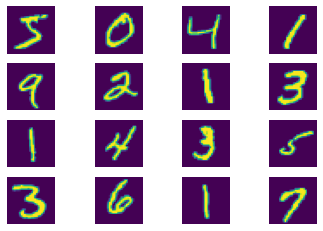

In [144]:
size = 16
sqrt_size = math.sqrt(size)

plt.figure()

for i in range(size):
  plt.subplot(sqrt_size, sqrt_size, i + 1)
  plt.imshow(raw_training_attributes[i])
  plt.axis('off')

plt.show()

- **DNN - Rede Neural Artificial Profunda**

In [145]:
# Definição da estrutura da rede neural (nº de camadas, nós, ativação...)
model = keras.Sequential([
                          layers.Dense(512, activation=actv_funct, input_dim=training_attributes.shape[1]),
                          layers.Dense(256, activation=actv_funct),
                          layers.Dense(124, activation=actv_funct),
                          layers.Dense(n_classes, activation=exit_actv_funct)
])

# Sumário da rede neural e treinamento da mesma
model.summary()
model.compile(loss=lss, optimizer=opt, metrics=['accuracy'])
model.fit(training_attributes, training_classes, batch_size=b_size, epochs=n_epochs, verbose=1)

# Desempenho do modelo
results = model.evaluate(test_attributes, test_classes, verbose=0)
print('\nPerda:    ' + str(round(results[0] * 100, 2)) + '%')
print('Acurácia: ' + str(round(results[1] * 100, 2)) + '%')

# Salvamento do modelo
model.save(os.getcwd() + dir + 'DNN_' + str(n_epochs) + '_' + str(b_size) + '_' + str(actv_funct) + '_' + 
                                 str(exit_actv_funct) + '_' + str(opt) + '_' + str(lss) + '.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 124)               31868     
                                                                 
 dense_9 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
1000/1000 [==============================] - 9s 9ms/step - loss: 0.2030 - accuracy: 0.9379
Epoch 2/4
1000/1000 [==============================] - 9s 9ms/step - loss: 0.08

- **CNN - Rede Neural Artificial Convolucional**

In [147]:
model = keras.Sequential()

# Primeira camada convolucional
model.add(layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='same', activation=actv_funct, input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Segunda camada convolucional
model.add(layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation=actv_funct))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Camada de 'Dropout' que 'reseta' dados da entrada aleatoriamente a cada n passos de treinamento, com o intuito de reduzir overfitting 
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

# Duas camadas inteiramente conectadas 
model.add(layers.Dense(128, activation=actv_funct))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation=tf.nn.softmax))

# Redimensionamento dos dados, adaptando para utilização da CNN
cnn_training_attributes = training_attributes.reshape(60000, 28, 28, 1)
cnn_test_attributes = test_attributes.reshape(10000, 28, 28, 1)

# Treinamento da rede neural
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])
model.fit(cnn_training_attributes, training_classes, epochs=n_epochs, batch_size=b_size)

# Desempenho do modelo
results = model.evaluate(cnn_test_attributes, test_classes, verbose=0)
print('\nPerda:    ' + str(round(results[0] * 100, 2)) + '%')
print('Acurácia: ' + str(round(results[1] * 100, 2)) + '%')

model.save(os.getcwd() + dir + 'CNN_' + str(n_epochs) + '_' + str(b_size) + str(actv_funct) + '_' + 
                                 str(exit_actv_funct) + '_' + str(opt) + '_' + str(lss) + '.h5')

Epoch 1/4
1000/1000 [==============================] - 83s 82ms/step - loss: 0.2209 - accuracy: 0.9312
Epoch 2/4
1000/1000 [==============================] - 82s 82ms/step - loss: 0.0805 - accuracy: 0.9757
Epoch 3/4
1000/1000 [==============================] - 81s 81ms/step - loss: 0.0634 - accuracy: 0.9814
Epoch 4/4
1000/1000 [==============================] - 80s 80ms/step - loss: 0.0524 - accuracy: 0.9842

Perda:    2.45%
Acurácia: 99.14%


- **Carregamento de modelos**

In [148]:
name = os.getcwd() + dir + 'CNN_4_60relu_softmax_Adam_categorical_crossentropy.h5'

loaded_model = load_model(name)
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

- **Visualização das predições**

Predições para as primeiras 25 imagens:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	

Primeiras 25 imagens do conjunto de teste:


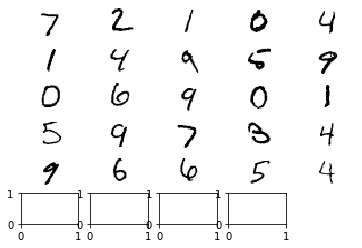

In [149]:
def visualize_predictions(attributes, n, c_map):

  final = np.argmax(loaded_model.predict(attributes[0 : n]), axis=-1)

  fig, ax = plt.subplots(nrows=int(n / 5) + 1, ncols=5)
  ax = ax.flatten()

  print('Predições para as primeiras {} imagens:'.format(n))

  for i in range(n):
    print(final[i],end=',')

    if int((i + 1) % 5) == 0:
      print('\t')
    
    img = attributes[i].reshape((28, 28))
    plt.axis("off")

    ax[i].imshow(img, cmap=c_map, interpolation='nearest')
    ax[i].axis("off")

  print('\nPrimeiras {} imagens do conjunto de teste:'.format(n))

visualize_predictions(cnn_test_attributes, 25, 'Greys')

- **Matriz de confusão**

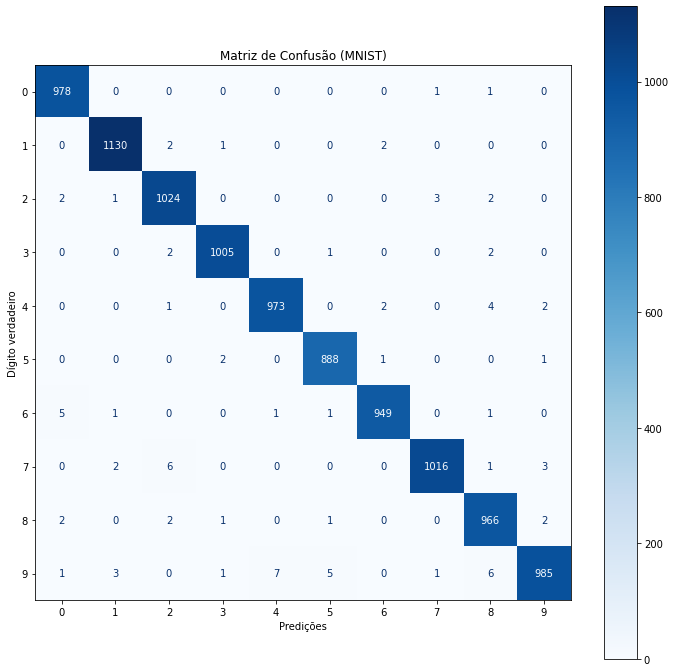

In [153]:
# Executa as predições
final = np.argmax(loaded_model.predict(cnn_test_attributes), axis=-1)

# Formata os dados dos rótulos reais para comparar com as predições
cnn_test_classes = list()
for i in range(len(test_classes)):
  cnn_test_classes.append(np.argmax(test_classes[i]))

# Nome das classes (Dígitos de 0 a 9)
class_names = [str(i) for i in range(n_classes)]

# Plot da matriz de confusão
fig_size = (12, 12)
ConfusionMatrixDisplay.from_predictions(cnn_test_classes, final, display_labels=class_names, cmap='Blues', ax=plt.subplots(figsize=fig_size)[1])
plt.title('Matriz de Confusão (MNIST)')
plt.xlabel('Predições')
plt.ylabel('Dígito verdadeiro')
plt.show()

- **Classificação de imagens reais (Não funcionou como o esperado)**

Predições para as primeiras 13 imagens:
8,3,3,3,8,	
3,3,3,3,3,	
3,3,3,
Primeiras 13 imagens do conjunto de teste:


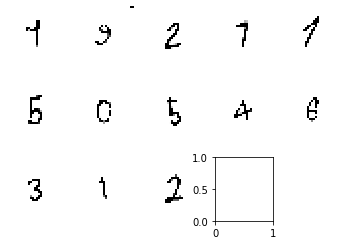

In [151]:
matrix = list()

# Obtém o diretório e a lista com os nomes das imagens
origin = os.getcwd() + '/digits/'
images = os.listdir(origin)

for image in images:

  # Arquivo oculto
  if image != '.ipynb_checkpoints':

    # Leitura da imagem
    img = cv.imread(origin + image)

    # Converte a imagem do espectro RGB para a escala de cinza
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Aplica desfoque na imagem (blur ou borrar)
    blurred = cv.GaussianBlur(gray, (37, 37), 0)

    # 'Binariza' a imagem de acordo com os limiares de cor (threshold)
    _, binarized = cv.threshold(blurred, 140, 255, cv.THRESH_BINARY)

    # Redimensiona a imagem original para 28 x 28 para utilizar na predição
    resized = cv.resize(binarized, (28, 28), interpolation=cv.INTER_CUBIC)
    
    # Acúmula os dados das imagens da base
    matrix.append(resized)

# Dados brutos das imagens reais
raw_instances = np.array(matrix)

# Pré-Processamento
t = raw_instances.reshape(13, 784)
real_test = t.astype('float32')/255
cnn_test = real_test.reshape(13, 28, 28, 1)

# Predições
visualize_predictions(cnn_test, 13, 'gray')